In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.6 MB/s 
     |████████████████████████████████| 16.7 MB 59.0 MB/s 
     |████████████████████████████████| 6.3 MB 44.2 MB/s 


In [3]:
import geopandas as gpd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/GitHub/automating-gis-processes/Lesson-2

/content/drive/MyDrive/GitHub/automating-gis-processes/Lesson-2


In [6]:
!wget https://github.com/AutoGIS/data/raw/master/L2_data.zip

--2022-08-06 15:14:08--  https://github.com/AutoGIS/data/raw/master/L2_data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip [following]
--2022-08-06 15:14:09--  https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12116862 (12M) [application/zip]
Saving to: ‘L2_data.zip’

L2_data.zip         100%[===================>]  11.55M  31.9MB/s    in 0.4s    

2022-08-06 15:14:09 (31.9 MB/s) - ‘L2_data.zip’ saved [12116862/12116862]



In [7]:
%ls

Geopandas.ipynb  L2_data.zip


In [8]:
!unzip L2_data.zip

Archive:  L2_data.zip
   creating: L2_data/
 extracting: L2_data/Europe_borders.cpg  
  inflating: L2_data/Europe_borders.dbf  
  inflating: L2_data/Europe_borders.prj  
  inflating: L2_data/Europe_borders.sbn  
  inflating: L2_data/Europe_borders.sbx  
  inflating: L2_data/Europe_borders.shp  
  inflating: L2_data/Europe_borders.shx  
   creating: L2_data/ne_110m_admin_0_countries/
 extracting: L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.cpg  
  inflating: L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.dbf  
  inflating: L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.prj  
  inflating: L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.README.html  
  inflating: L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp  
  inflating: L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shx  
 extracting: L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.VERSION.txt  
   creating: L2_data/NLS/
   creating: L2_dat

In [9]:
%ls

1_Geopandas_Basics.ipynb  L2_data/  L2_data.zip


### Managing filepaths

Built-in module os provides many useful functions for interacting with the operating system. One of the most useful submodules in the os package is the os.path-module for manipulating file paths. This week, we have data in different sub-folders and we can practice how to use os path tools when defining filepaths.

Let’s import os and see how we can construct a filepath by joining a folder path and file name:

In [12]:
import os

# Define path to folder
input_folder = r"L2_data/NLS/2018/L4/L41/L4132R.shp"

# Join folder path and filename
fp = os.path.join(input_folder, "m_L4132R_p.shp")

# Print out the full file path
print(fp)

L2_data/NLS/2018/L4/L41/L4132R.shp/m_L4132R_p.shp


## Reading a Shapefile

Esri Shapefile is the default file format when reading in data usign geopandas, so we only need to pass the file path in order to read in our data:

In [13]:
# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [14]:
type(data)

geopandas.geodataframe.GeoDataFrame

Check the first rows of data:

In [15]:
data.head()

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,KARTOGLK,ALUEJAKOON,VERSUH,SUUNTA,SIIRT_DX,SIIRT_DY,KORKEUS,ATTR2,ATTR3,geometry
0,None,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,None,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,None,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,None,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,None,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


Check all column names:

In [16]:
data.columns.values

array(['TEKSTI', 'RYHMA', 'LUOKKA', 'TASTAR', 'KORTAR', 'KORARV',
       'KULKUTAPA', 'KOHDEOSO', 'AINLAHDE', 'SYNTYHETKI', 'KUOLHETKI',
       'KARTOGLK', 'ALUEJAKOON', 'VERSUH', 'SUUNTA', 'SIIRT_DX',
       'SIIRT_DY', 'KORKEUS', 'ATTR2', 'ATTR3', 'geometry'], dtype=object)

In [17]:
data = data[['RYHMA', 'LUOKKA', 'geometry']]
print(data.head())

   RYHMA  LUOKKA                                           geometry
0     64   32421  POLYGON ((379394.248 6689991.936, 379389.790 6...
1     64   32421  POLYGON ((378980.811 6689359.377, 378983.401 6...
2     64   32421  POLYGON ((378804.766 6689256.471, 378817.107 6...
3     64   32421  POLYGON ((379229.695 6685025.111, 379233.366 6...
4     64   32421  POLYGON ((379825.199 6685096.247, 379829.651 6...


Define new column names in dictionary

In [18]:
colnames = {'RYHMA': 'GROUP', 'LUOKKA': 'CLASS'}

Rename

In [19]:
data.rename(columns=colnames, inplace=True)

Check the output:

In [20]:
print(data)

      GROUP  CLASS                                           geometry
0        64  32421  POLYGON ((379394.248 6689991.936, 379389.790 6...
1        64  32421  POLYGON ((378980.811 6689359.377, 378983.401 6...
2        64  32421  POLYGON ((378804.766 6689256.471, 378817.107 6...
3        64  32421  POLYGON ((379229.695 6685025.111, 379233.366 6...
4        64  32421  POLYGON ((379825.199 6685096.247, 379829.651 6...
...     ...    ...                                                ...
4306     64  36313  POLYGON ((375668.607 6682942.062, 375671.489 6...
4307     64  36313  POLYGON ((368411.063 6679328.990, 368411.424 6...
4308     64  36313  POLYGON ((368054.608 6679164.737, 368059.602 6...
4309     64  36313  POLYGON ((368096.331 6678000.000, 368090.276 6...
4310     64  36313  POLYGON ((368000.666 6678460.142, 368000.000 6...

[4311 rows x 3 columns]


In [25]:
# Number of rows
# data.shape[0]
print(f"Number of rows: {len(data)}")

# Number of groups
print(f"Number of groups: {data['GROUP'].nunique()}")

# Number of classes
print(f"Number of classes: {data['CLASS'].nunique()}")

Number of rows: 4311
Number of groups: 1
Number of classes: 20


### Visualization

Creating a simple map from GeoDataFrame with .plot()

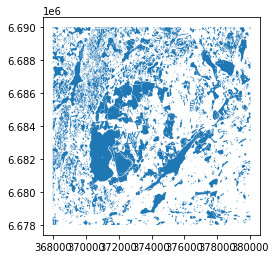

In [26]:
data.plot()

### Geometries in Geopandas

In [27]:
data['geometry'].head()

0    POLYGON ((379394.248 6689991.936, 379389.790 6...
1    POLYGON ((378980.811 6689359.377, 378983.401 6...
2    POLYGON ((378804.766 6689256.471, 378817.107 6...
3    POLYGON ((379229.695 6685025.111, 379233.366 6...
4    POLYGON ((379825.199 6685096.247, 379829.651 6...
Name: geometry, dtype: geometry

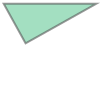

In [29]:
# Acces the geometry on the first row of data
data.at[0, 'geometry'] # data.at[row number, column name]

In [30]:
# print information about the area
print(f"Area: {round(data.at[0, 'geometry'].area, 0)} square meters")

Area: 76.0 square meters


Let’s do the same for the first five rows in the data;

Iterate over the GeoDataFrame rows using the iterrows()

For each row, print the area of the polygon (here, we’ll limit the for-loop to a selection of the first five rows):

In [38]:
# Iterate over rows and print the area of a polygon
for index, row in data[0:5].iterrows():

#   # Get area from the shapely object stored in the geometry column
  poly_area = row['geometry'].area

#   # Print info
  print(f"Polygon area at index {index} is: {round(poly_area, 0)} square meters")

Polygon area at index 0 is: 76.0 square meters
Polygon area at index 1 is: 2652.0 square meters
Polygon area at index 2 is: 3186.0 square meters
Polygon area at index 3 is: 13075.0 square meters
Polygon area at index 4 is: 3981.0 square meters


In [39]:
# Calculate the area of each of the polygons in the dataframe
data.area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4306     2651.800270
4307      376.503380
4308      413.942555
4309     3487.927677
4310     1278.963199
Length: 4311, dtype: float64

In [40]:
# Creat a new column called 'area'
data['area'] = data.area

In [41]:
data.head()

,GROUP,CLASS,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


In [42]:
# Maximum area
round(data['area'].max(), 2)

4084558.15

In [43]:
# Minimum area
round(data['area'].min(), 2)

0.67

In [44]:
# Average area
round(data['area'].mean(), 2)

11522.29

### Writing data into a shapefile

It is possible to export GeoDataFrames into various data formats using the to_file() method. In our case, we want to export subsets of the data into Shapefiles (one file for each feature class).

Let’s first select one class (class number 36200, “Lake water”) from the data as a new GeoDataFrame:

In [50]:
# Select a class
selection = data.loc[data['CLASS']==36200]

      GROUP  CLASS                                           geometry  \
4247     64  36200  POLYGON ((379089.473 6687069.722, 379093.838 6...   
4248     64  36200  POLYGON ((376732.156 6687178.141, 376731.301 6...   
4249     64  36200  POLYGON ((377939.741 6684539.678, 377929.192 6...   
4250     64  36200  POLYGON ((372948.857 6688594.047, 372935.951 6...   
4251     64  36200  POLYGON ((370900.963 6689201.649, 370890.077 6...   

               area  
4247    1318.878221  
4248   22918.867073  
4249    5759.318345  
4250  265899.648379  
4251  128221.314258  


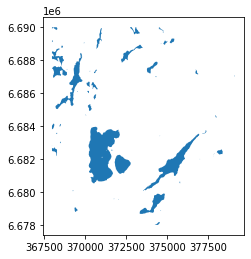

In [51]:
selection.plot()
print(selection.head())

write this layer into a new Shapefile using the gpd.to_file() -function:

In [52]:
# Create a output path for the data
output_folder = r"L2_data"
output_fp = os.path.join(output_folder, "Class_36200.shp")

In [53]:
# Write those rows into anew file (the default output file format is Shapefile)
selection.to_file(output_fp)

### Try it

In [54]:
temp = gpd.read_file(output_fp)

In [55]:
temp.head()

,GROUP,CLASS,area,geometry
0,64,36200,1318.878221,"POLYGON ((379089.473 6687069.722, 379093.838 6..."
1,64,36200,22918.867073,"POLYGON ((376732.156 6687178.141, 376731.301 6..."
2,64,36200,5759.318345,"POLYGON ((377939.741 6684539.678, 377929.192 6..."
3,64,36200,265899.648379,"POLYGON ((372948.857 6688594.047, 372935.951 6..."
4,64,36200,128221.314258,"POLYGON ((370900.963 6689201.649, 370890.077 6..."


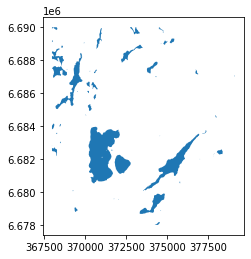

In [56]:
temp.plot()

### Grouping the Geodataframe

One really useful function that can be used in Pandas/Geopandas is groupby() which groups data based on values on selected column(s).

Next we will automate the file export task; we will group the data based on column CLASS and export a shapefile for each class.

Let’s continue with the same input file we already read previously into the variable data. We also selected and renamed a subset of the columns.

Check again the first rows of our input data:

In [57]:
data.head()

,GROUP,CLASS,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


The CLASS column in the data contains information about different land use types. With .unique() -function we can quickly see all different values in that column:

In [59]:
data['CLASS'].unique()

array([32421, 32200, 34300, 34100, 34700, 32500, 32112, 32111, 32611,
       32612, 32800, 32900, 35300, 35412, 35411, 35421, 33000, 33100,
       36200, 36313])

In [60]:
# Group the data by class
grouped = data.groupby('CLASS')
grouped

In [61]:
# Check group keys
grouped.groups.keys()

dict_keys([32111, 32112, 32200, 32421, 32500, 32611, 32612, 32800, 32900, 33000, 33100, 34100, 34300, 34700, 35300, 35411, 35412, 35421, 36200, 36313])

Check how many rows of data each group has

In [62]:
# Iterate over the grouped object
for key, group in grouped:

  # Let's check how many rows each group has:
  print(f"Terrain classes {key}")
  print(f"Number of row: {len(group)}")

Terrain classes 32111
Number of row: 1
Terrain classes 32112
Number of row: 1
Terrain classes 32200
Number of row: 2
Terrain classes 32421
Number of row: 110
Terrain classes 32500
Number of row: 2
Terrain classes 32611
Number of row: 257
Terrain classes 32612
Number of row: 11
Terrain classes 32800
Number of row: 80
Terrain classes 32900
Number of row: 28
Terrain classes 33000
Number of row: 5
Terrain classes 33100
Number of row: 118
Terrain classes 34100
Number of row: 3005
Terrain classes 34300
Number of row: 1
Terrain classes 34700
Number of row: 3
Terrain classes 35300
Number of row: 134
Terrain classes 35411
Number of row: 35
Terrain classes 35412
Number of row: 449
Terrain classes 35421
Number of row: 5
Terrain classes 36200
Number of row: 56
Terrain classes 36313
Number of row: 8


We can also check how the last group looks like (we have the variables in memory from the last iteration of the for-loop):

In [63]:
group.head()

,GROUP,CLASS,geometry,area
4303,64,36313,"POLYGON ((377127.305 6688073.257, 377116.045 6...",9619.307973
4304,64,36313,"POLYGON ((371141.897 6677999.999, 371139.757 6...",25266.167705
4305,64,36313,"POLYGON ((371498.720 6680399.799, 371497.585 6...",364.087680
4306,64,36313,"POLYGON ((375668.607 6682942.062, 375671.489 6...",2651.800270
4307,64,36313,"POLYGON ((368411.063 6679328.990, 368411.424 6...",376.503380


In [64]:
type(group)

geopandas.geodataframe.GeoDataFrame

### Saving multiple output files

Let’s export each class into a separate Shapefile. While doing this, we also want to create unique filenames for each class.

When looping over the grouped object, information about the class is stored in the variable key, and we can use this information for creating new variable names inside the for-loop. For example, we want to name the shapefile containing lake polygons as “terrain_36200.shp”.

In [65]:
# Determine output directory
output_folder = r"L2_data/"

# Create a new folder called 'Results'
result_folder = os.path.join(output_folder, 'Results')

In [66]:
# Check if the folder exists already
if not os.path.exists(result_folder):

  # If it does not exist, create one
  print("Creating a folder for the results..")
  os.makedirs(result_folder)
else:
  print("Results folder exists already")

Creating a folder for the results..


At this point, you can go to the file browser and check that the new folder was created successfully.

Iterate over groups, create a file name, and save group to file:

In [67]:
# Iterate over the groups
for key, group in grouped:

  # Format the filename
  output_name = "terrain_{}".format(key)

  # Print information about the process
  print(f"Saving file {os.path.basename(output_name)}")

  # Create an output path
  outpath = os.path.join(result_folder, output_name)

  # Export the data
  group.to_file(outpath)

Saving fileterrain_32111
Saving fileterrain_32112
Saving fileterrain_32200
Saving fileterrain_32421
Saving fileterrain_32500
Saving fileterrain_32611
Saving fileterrain_32612
Saving fileterrain_32800
Saving fileterrain_32900
Saving fileterrain_33000
Saving fileterrain_33100
Saving fileterrain_34100
Saving fileterrain_34300
Saving fileterrain_34700
Saving fileterrain_35300
Saving fileterrain_35411
Saving fileterrain_35412
Saving fileterrain_35421
Saving fileterrain_36200
Saving fileterrain_36313


Save data to csv

Summarize total area of each group

In [70]:
area_info = grouped.area.sum().round()

In [71]:
area_info

CLASS
32111        1834.0
32112        2148.0
32200      105737.0
32421      702073.0
32500      109747.0
32611    13135597.0
32612      107343.0
32800     1465278.0
32900      617209.0
33000      659465.0
33100     3777595.0
34100    12381611.0
34300        1627.0
34700        2786.0
35300     1382940.0
35411      411198.0
35412     4710133.0
35421       67864.0
36200     9986966.0
36313       43459.0
Name: area, dtype: float64

Save area to csv using pandas

In [72]:
# Creat an output path
area_info.to_csv(os.path.join(result_folder, "terrain_class_areas.csv"), header=True)